<a href="https://colab.research.google.com/github/plaban1981/Timeseries/blob/master/Grocery_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving Test.csv to Test.csv


{'Test.csv': b'Day\n693\n694\n695\n696\n697\n698\n699\n700\n701\n702\n703\n704\n705\n706\n707\n708\n709\n710\n711\n712\n713\n714\n715\n716\n717\n718\n719\n720\n721\n722\n723\n724\n725\n726\n727\n728\n729\n730\n731\n732\n733\n734\n735\n736\n737\n738\n739\n740\n741\n742\n743\n744\n745\n746\n747\n748\n749\n750\n751\n752\n753\n754\n755\n756\n757\n758\n759\n760\n761\n762\n763\n764\n765\n766\n767\n768\n769\n770\n771\n772\n773\n774\n775\n776\n777\n778\n779\n780\n781\n782\n'}

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fbprophet
import pandas.util.testing as tm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [64]:
train.shape,test.shape

((692, 2), (90, 1))

In [51]:
test.head()

,Day
0,693
1,694
2,695
3,696
4,697


In [0]:
train_date = pd.date_range(start='2018-01-01',periods=692)

In [66]:
train_date[-1]

Timestamp('2019-11-23 00:00:00', freq='D')

In [0]:
train['Date'] = train_date

In [68]:
train.head()

,Day,GrocerySales,Date
0,1,8418.59,2018-01-01
1,2,8447.47,2018-01-02
2,3,8336.49,2018-01-03
3,4,8579.17,2018-01-04
4,5,8524.31,2018-01-05


In [0]:
test_date =  pd.date_range(start='2019-11-24',periods=90)

In [0]:
test['Date'] = test_date

In [71]:
test_date.shape

(90,)

In [72]:
test.head()

,Day,Date
0,693,2019-11-24
1,694,2019-11-25
2,695,2019-11-26
3,696,2019-11-27
4,697,2019-11-28


In [0]:
test.shape

(90, 2)

In [0]:
df_test = test[['Date']]

In [0]:
df_train = train[['Date','GrocerySales']]

In [0]:
df = df_train.copy()

In [76]:
df.head()

,Date,GrocerySales
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


In [0]:
train_date = pd.date_range(start='2018-01-01',periods=692)
train['Date'] = train_date
test_date =  pd.date_range(start='2019-11-24',periods=90)
test['Date'] = test_date

In [0]:
df = train[['Date','GrocerySales']].copy()

In [0]:
df = df.rename(columns={'Date':'ds','GrocerySales':'y'})

In [0]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
m = fbprophet.Prophet(interval_width=0.95,daily_seasonality=True)



In [95]:
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
future_dates = m.make_future_dataframe(periods=90)

In [81]:
future_dates.shape

(782, 1)

In [97]:
future_dates.tail()

,ds
777,2020-02-17
778,2020-02-18
779,2020-02-19
780,2020-02-20
781,2020-02-21


The DataFrame of future dates is then used as input to the predict method of our fitted model.

In [98]:
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
777,2020-02-17,9022.955280,8330.147196,9750.438107
778,2020-02-18,9005.256578,8296.790720,9664.407670
779,2020-02-19,8981.499268,8297.513444,9701.479114
780,2020-02-20,9022.414954,8283.592906,9669.157730
781,2020-02-21,9018.440693,8307.022332,9671.314146


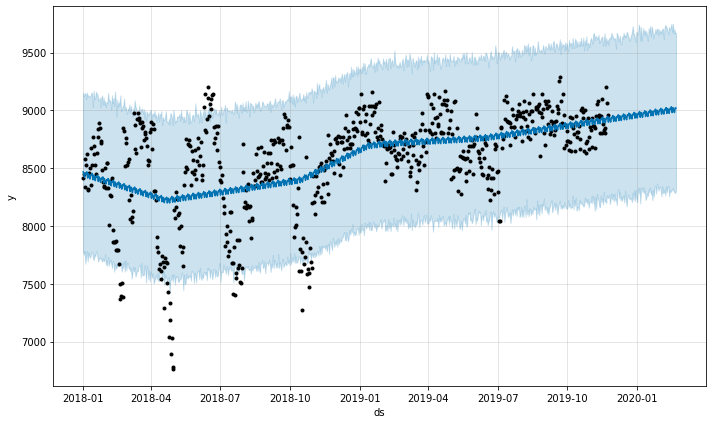

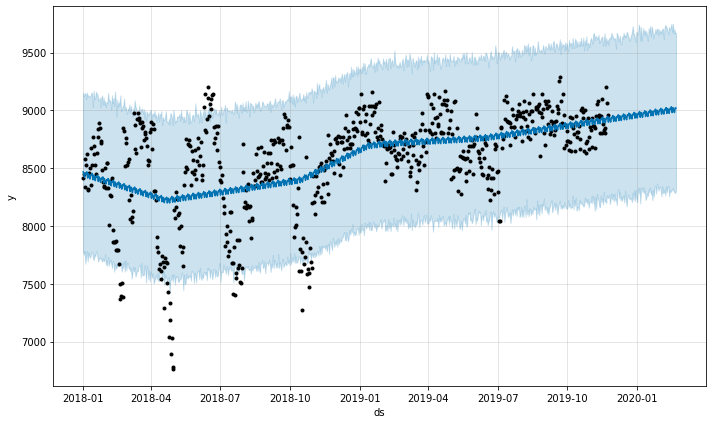

In [100]:
# Plot Our Predictions
m.plot(forecast)

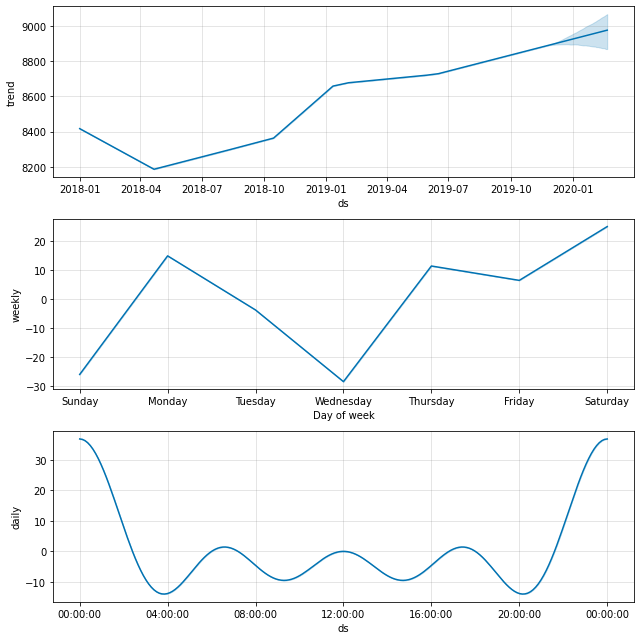

In [101]:
# Visualize Each Component [Trends,Weekly]
m.plot_components(forecast)
plt.show()

In [0]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(m,initial='1 days', period='90 days', horizon = '34 days')
cv.head()

INFO:fbprophet:Making 8 forecasts with cutoffs between 2018-01-28 00:00:00 and 2019-10-20 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-29,8423.583308,8281.417534,8569.887414,8333.17,2018-01-28
1,2018-01-30,8392.555156,8238.790965,8536.557893,8497.34,2018-01-28
2,2018-01-31,8271.565183,8137.434954,8420.748984,8326.74,2018-01-28
3,2018-02-01,8304.617301,8147.744431,8451.684845,8542.81,2018-01-28
4,2018-02-02,8147.405480,7997.989095,8297.115717,8544.43,2018-01-28


In [0]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)

df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,2.452664e+05,495.243775,339.462354,0.041323,0.026066,0.763889
1,5 days,3.304308e+05,574.831091,403.882055,0.048567,0.026066,0.666667
2,6 days,3.431555e+05,585.794763,416.353696,0.049975,0.028271,0.638889
3,7 days,3.352080e+05,578.971466,395.991902,0.047340,0.024317,0.722222
4,8 days,3.487002e+05,590.508454,404.442152,0.048380,0.028271,0.699074
5,9 days,3.751246e+05,612.474171,429.493912,0.051478,0.033107,0.675926
6,10 days,4.056901e+05,636.938064,464.995241,0.055919,0.039733,0.615741
7,11 days,3.981085e+05,630.958375,461.428308,0.055873,0.039649,0.611111
8,12 days,4.095290e+05,639.944512,465.159851,0.056502,0.039733,0.662037
9,13 days,3.797835e+05,616.265779,436.111125,0.053176,0.027796,0.699074


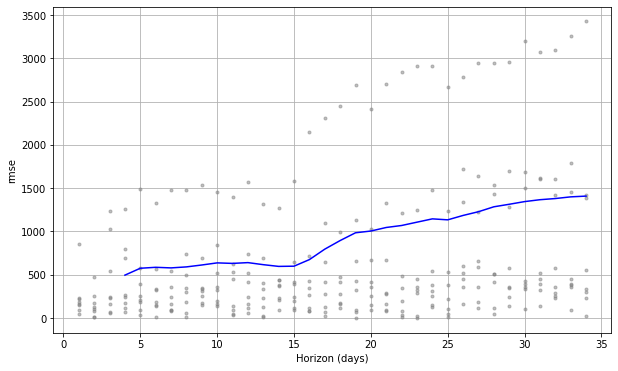

In [0]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')
plt.show()

In [0]:
f = forecast[['ds','yhat']]

In [0]:
a = df.copy()

In [0]:
a['ds'] = pd.to_datetime(a['ds'])

In [91]:
pred = pd.merge(a,f,how='inner',on='ds')
pred.head()

,ds,y,yhat
0,2018-01-01,8418.59,8454.927862
1,2018-01-02,8447.47,8434.319885
2,2018-01-03,8336.49,8407.648471
3,2018-01-04,8579.17,8445.701803
4,2018-01-05,8524.31,8438.826770


# Evaluation of Predictions

In [92]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred['y'],pred['yhat']))

355.4365508446735

In [0]:
df.tail()

,ds,y
687,2019-11-19,8848.98
688,2019-11-20,8800.45
689,2019-11-21,9197.99
690,2019-11-22,9062.44
691,2019-11-23,8963.12


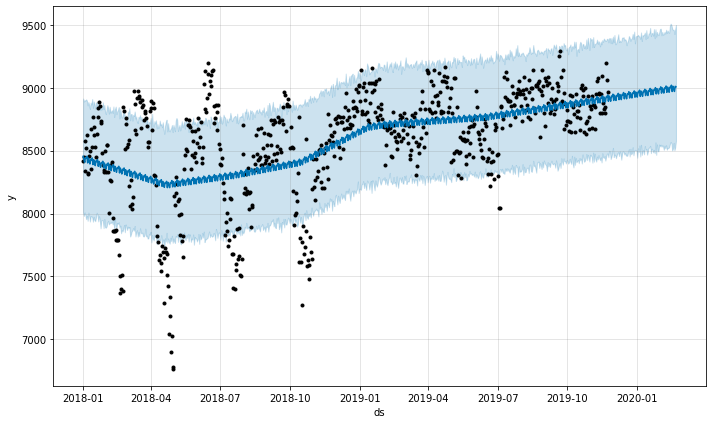

In [0]:
m.plot(forecast)
plt.show()


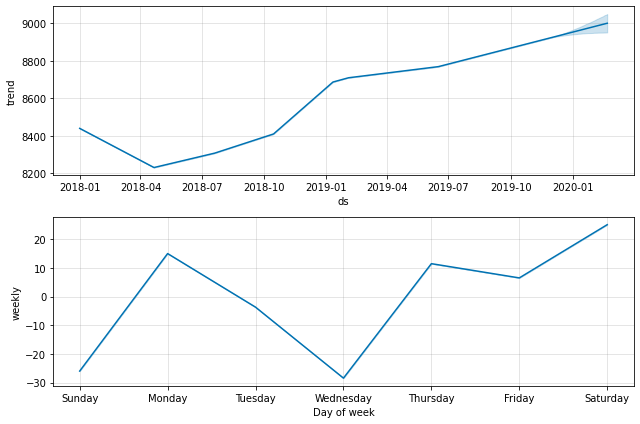

In [0]:
m.plot_components(forecast)
plt.show()


In [0]:
sub = forecast.loc[692:]

In [0]:
sub = sub.rename(columns={'yhat':'GrocerySales'})

In [0]:
sub.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,GrocerySales
692,2020-05-02,8766.191408,8300.629910,9013.853927,8766.191408,8766.191408,-116.922270,-116.922270,-116.922270,6.245334,6.245334,6.245334,-123.167604,-123.167604,-123.167604,0.0,0.0,0.0,8649.269137
693,2020-05-03,8766.125514,8226.667438,8955.584100,8766.125514,8766.125514,-179.587642,-179.587642,-179.587642,-12.080925,-12.080925,-12.080925,-167.506717,-167.506717,-167.506717,0.0,0.0,0.0,8586.537872
694,2020-05-04,8766.059621,8191.504052,8888.698961,8766.059621,8766.059621,-227.573697,-227.573697,-227.573697,-15.668073,-15.668073,-15.668073,-211.905624,-211.905624,-211.905624,0.0,0.0,0.0,8538.485924
695,2020-05-05,8765.993728,8140.889465,8869.662226,8765.993728,8765.993728,-257.102720,-257.102720,-257.102720,-1.252368,-1.252368,-1.252368,-255.850353,-255.850353,-255.850353,0.0,0.0,0.0,8508.891007
696,2020-05-06,8765.927834,8138.209624,8811.041934,8765.927834,8765.927834,-281.434290,-281.434290,-281.434290,17.387811,17.387811,17.387811,-298.822101,-298.822101,-298.822101,0.0,0.0,0.0,8484.493544


In [0]:
sub.loc[692:]['GrocerySales'].to_excel('sub.xlsx',index=False)

In [0]:
test.head()

,Day,TS,Date
0,693,2020-05-05,2020-05-05
1,694,2020-05-06,2020-05-06
2,695,2020-05-07,2020-05-07
3,696,2020-05-08,2020-05-08
4,697,2020-05-09,2020-05-09


In [0]:
sub.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,GrocerySales
777,2020-07-26,8760.590473,8806.543341,9566.137856,8722.002534,8797.270380,416.259241,416.259241,416.259241,-12.080925,-12.080925,-12.080925,428.340167,428.340167,428.340167,0.0,0.0,0.0,9176.849714
778,2020-07-27,8760.524579,8809.291859,9509.310263,8721.192133,8797.729634,413.815741,413.815741,413.815741,-15.668073,-15.668073,-15.668073,429.483813,429.483813,429.483813,0.0,0.0,0.0,9174.340320
779,2020-07-28,8760.458686,8843.395549,9536.779369,8720.617445,8798.370334,427.333311,427.333311,427.333311,-1.252368,-1.252368,-1.252368,428.585679,428.585679,428.585679,0.0,0.0,0.0,9187.791997
780,2020-07-29,8760.392792,8834.287182,9591.090160,8719.959034,8799.199782,442.934193,442.934193,442.934193,17.387811,17.387811,17.387811,425.546382,425.546382,425.546382,0.0,0.0,0.0,9203.326985
781,2020-07-30,8760.326899,8834.511079,9582.986935,8719.309182,8800.149374,451.588985,451.588985,451.588985,31.313807,31.313807,31.313807,420.275177,420.275177,420.275177,0.0,0.0,0.0,9211.915884


In [0]:
sub = sub[['ds','GrocerySales']]

In [0]:
sub.tail()

,ds,GrocerySales
777,2020-07-26,9176.849714
778,2020-07-27,9174.340320
779,2020-07-28,9187.791997
780,2020-07-29,9203.326985
781,2020-07-30,9211.915884


In [0]:
sub = sub.rename(columns={'ds':'Date'})

In [0]:
test.head()

,Day,Date
0,693,2020-05-02
1,694,2020-05-03
2,695,2020-05-04
3,696,2020-05-05
4,697,2020-05-06


In [0]:
test = pd.merge(test,sub,how='inner',on='Date')

In [0]:
test.head()

,Day,Date,GrocerySales
0,693,2020-05-02,8649.269137
1,694,2020-05-03,8586.537872
2,695,2020-05-04,8538.485924
3,696,2020-05-05,8508.891007
4,697,2020-05-06,8484.493544


In [0]:
test.shape

(90, 3)

In [0]:
test['GrocerySales'].to_excel('sub1.xlsx',index=False)

AUTO ARIMA

In [0]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [0]:
train_date = pd.date_range(start='2018-01-01',periods=692)
train['Date'] = train_date
test_date =  pd.date_range(start='2019-11-24',periods=90)
test['Date'] = test_date

In [113]:
train.tail()

,Day,GrocerySales,Date
687,688,8848.98,2019-11-19
688,689,8800.45,2019-11-20
689,690,9197.99,2019-11-21
690,691,9062.44,2019-11-22
691,692,8963.12,2019-11-23


In [114]:
test.head()

,Day,Date
0,693,2019-11-24
1,694,2019-11-25
2,695,2019-11-26
3,696,2019-11-27
4,697,2019-11-28


In [0]:
df_train = train[['Date','GrocerySales']].copy()

In [116]:
df_train.head()

,Date,GrocerySales
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


In [0]:
df = df_train.copy()

In [118]:
df.head()

,Date,GrocerySales
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


In [0]:
df.set_index('Date',inplace=True)

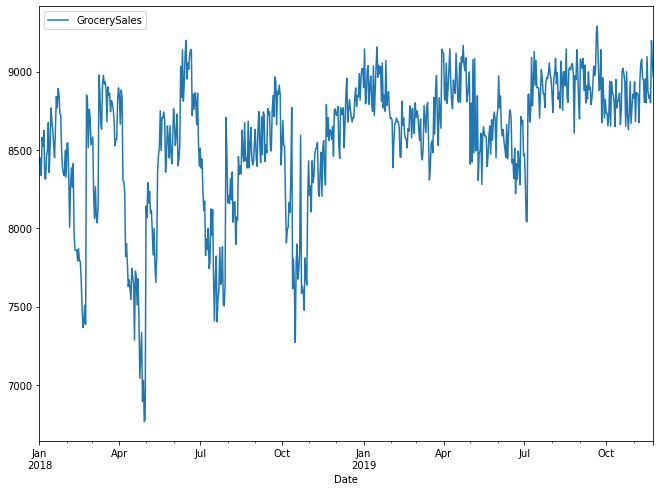

In [14]:
#df = df.set_index('ds')
df.plot(figsize=(11,8))

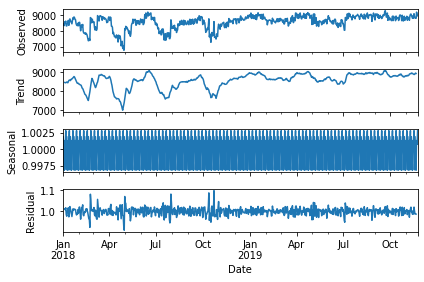

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

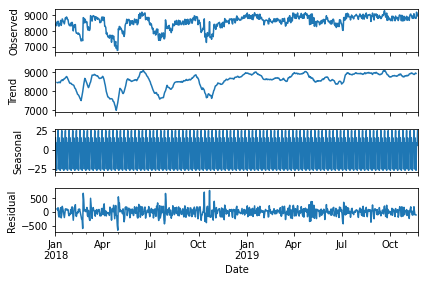

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

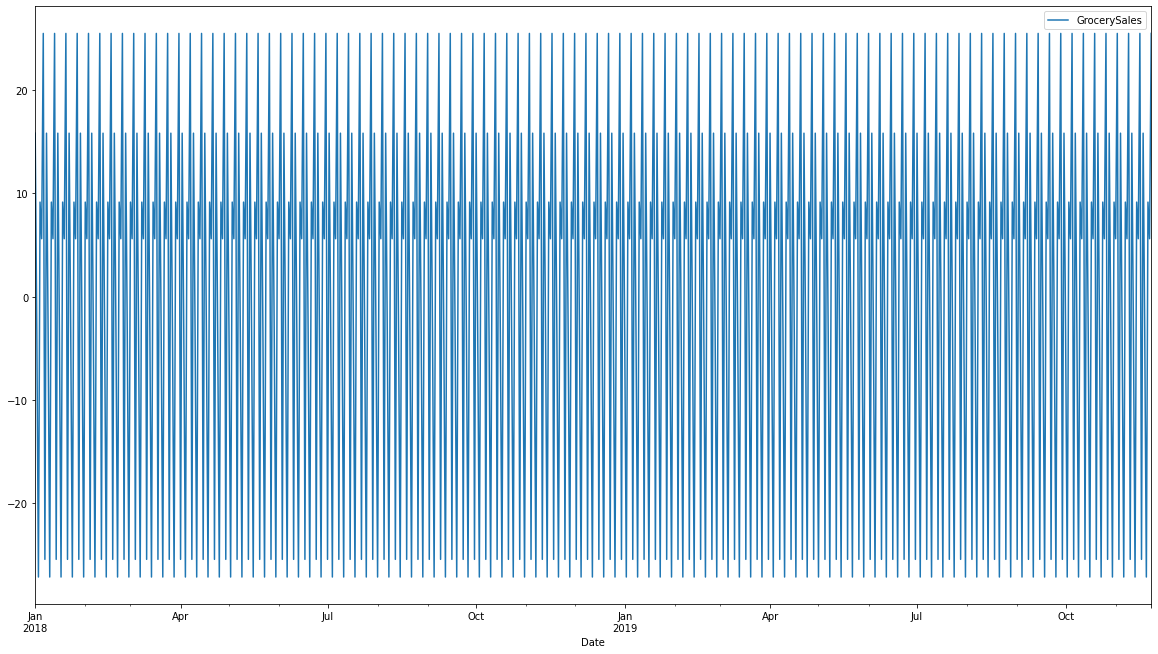

In [40]:
result.seasonal.plot(figsize=(20,11))

In [38]:
result.observed.head()

,GrocerySales
Date,
2018-01-01,8418.59
2018-01-02,8447.47
2018-01-03,8336.49
2018-01-04,8579.17
2018-01-05,8524.31


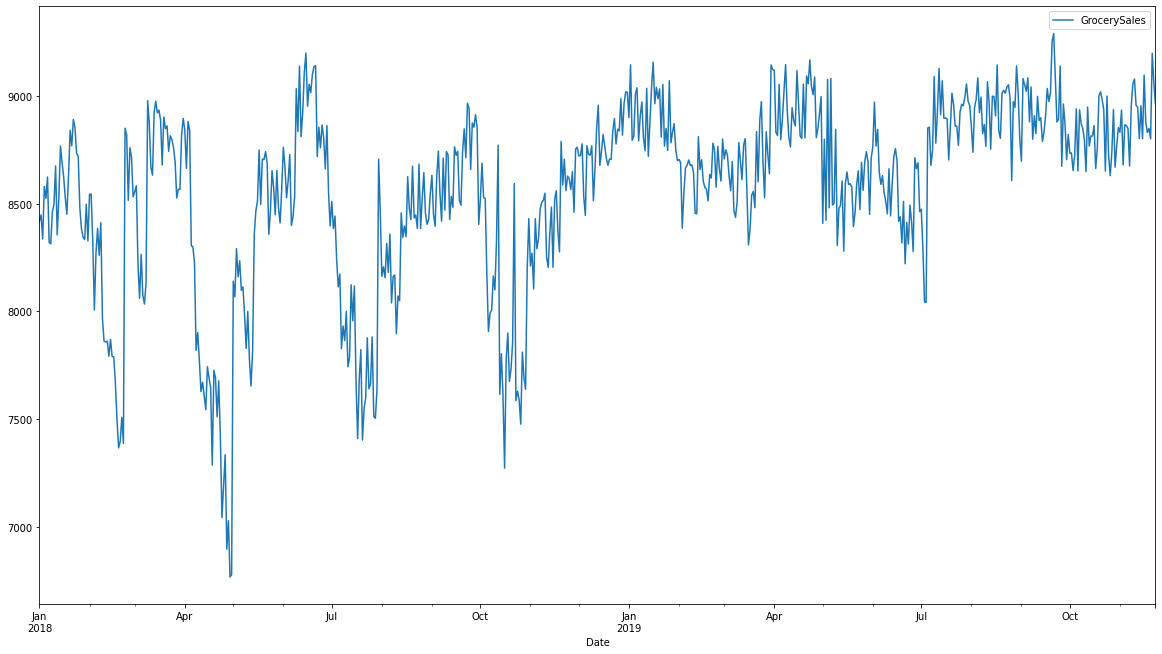

In [42]:
result.observed.plot(figsize=(20,11))

In [43]:
result.observed.head()

,GrocerySales
Date,
2018-01-01,8418.59
2018-01-02,8447.47
2018-01-03,8336.49
2018-01-04,8579.17
2018-01-05,8524.31


# Test Stationarity

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [27]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['GrocerySales'])
result

(-4.316545880313047,
 0.00041580115914318803,
 2,
 689,
 {'1%': -3.439876604020831,
  '10%': -2.5690087183208665,
  '5%': -2.8657439615125675},
 9055.41842546722)

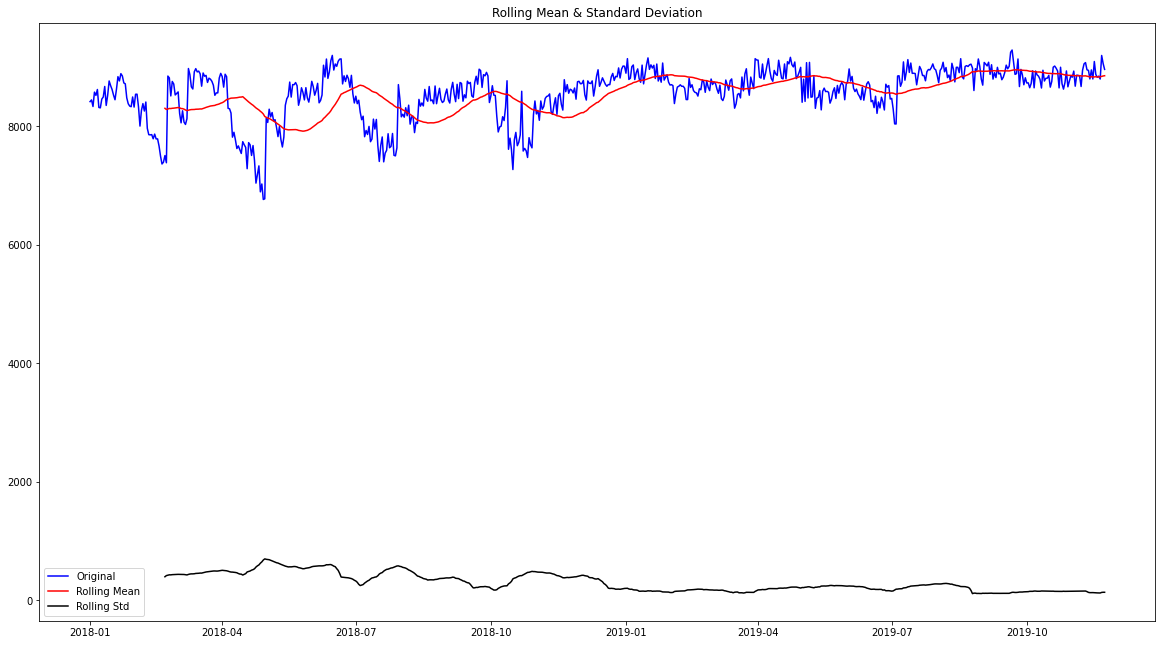

Results of Dickey-Fuller Test:
Test Statistic                  -4.316546
p-value                          0.000416
#Lags Used                       2.000000
Number of Observations Used    689.000000
Critical Value (1%)             -3.439877
Critical Value (5%)             -2.865744
Critical Value (10%)            -2.569009
dtype: float64
ADF Test Statistic : -4.316545880313047
p-value : 0.00041580115914318803
#Lags Used : 2
Number of Observations Used : 689
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [30]:
plt.figure(figsize=(20,11))
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
      print(label+' : '+str(value) )
    if result[1] <= 0.05:
      print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
      print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

test_stationarity(df['GrocerySales'])

# Train Test Split

In [120]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

622 70


In [121]:
train.head()

,GrocerySales
Date,
2018-01-01,8418.59
2018-01-02,8447.47
2018-01-03,8336.49
2018-01-04,8579.17
2018-01-05,8524.31


In [0]:
!pip install pyramid

     |████████████████████████████████| 327kB 2.9MB/s 
     |████████████████████████████████| 235kB 8.6MB/s 
     |████████████████████████████████| 122kB 10.6MB/s 


In [45]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.1MB/s 


In [44]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 8.8MB/s 


In [123]:
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=8417.307, BIC=8443.895, Time=1.074 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=8494.557, BIC=8503.419, Time=0.028 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=8436.485, BIC=8449.779, Time=0.063 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=8416.753, BIC=8430.047, Time=0.136 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=8492.562, BIC=8496.993, Time=0.015 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=8414.828, BIC=8432.553, Time=0.155 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=8416.052, BIC=8438.208, Time=0.510 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=8415.404, BIC=8437.561, Time=0.626 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=8415.306, BIC=8433.031, Time=0.297 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=8420.734, BIC=8438.459, Time=0.117 seconds
Total fit time: 3.029 seconds


ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [0]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['GrocerySales'])

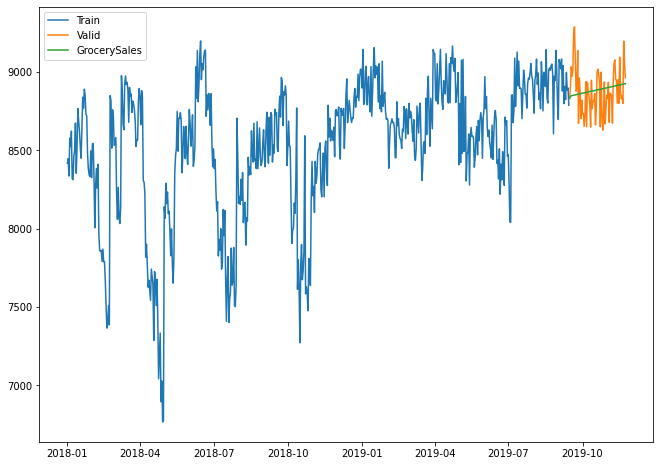

In [126]:
#plot the predictions for validation set
plt.figure(figsize=(11,8))
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='GrocerySales')

plt.legend()
plt.show()

In [128]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test,forecast))
print(rmse)

151.66021029573702


In [129]:
test.shape

(70, 1)

In [0]:
test = pd.read_csv('/content/Test.csv')
test_date =  pd.date_range(start='2019-11-24',periods=90)
test['Date'] = test_date

In [0]:
test = test.set_index('Date')

In [0]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['GrocerySales'])

In [137]:
forecast

,GrocerySales
Date,
2019-11-24,8833.998809
2019-11-25,8845.152717
2019-11-26,8848.564418
2019-11-27,8850.226245
2019-11-28,8851.492569
...,...
2020-02-17,8944.743541
2020-02-18,8945.894372
2020-02-19,8947.045202


In [138]:
forecast.shape

(90, 1)

In [0]:
forecast.to_excel('autoarima1.xlsx',index=False)

# Parameter Selection for the ARIMA Time Series Model

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [0]:
import itertools
import warnings
import statsmodels.api as sm

In [106]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [141]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
p = []
ps  = []
aicr = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            p.append(param)
            ps.append(param_seasonal)
            aicr.append(results.aic)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:13007.695681836427
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:12327.540718907181
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:9104.925833976144
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8902.438508002142
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:9120.931714011615
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9108.32840909499
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8945.338280173019
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8857.021592676338
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:12533.959145664681
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:12182.54932901264
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8852.185284479834
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8537.3124741386
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:9149.669471457877
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8748.807968679937
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8678.100565585224
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8510.015033310014
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8479.871469712009
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8320.035957224121
ARIMA(0, 1

In [142]:
df_result = pd.DataFrame({'param':p,'Seasonal_param':ps,'AIC':aicr})
df_result[df_result['AIC'] == df_result['AIC'].min()]

,param,Seasonal_param,AIC
59,"(1, 1, 1)","(0, 1, 1, 12)",8111.533825


The output of our code suggests that SARIMAX(1, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 8111.53. We should therefore consider this to be optimal option out of all the models we have considered.

## Fitting an ARIMA Time Series Model

In [143]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1999      0.086      2.318      0.020       0.031       0.369
ma.L1         -0.5743      0.076     -7.548      0.000      -0.723      -0.425
ma.S.L12      -0.9999      8.827     -0.113      0.910     -18.300      16.300
sigma2      4.505e+04   3.97e+05      0.113      0.910   -7.34e+05    8.24e+05


The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight.

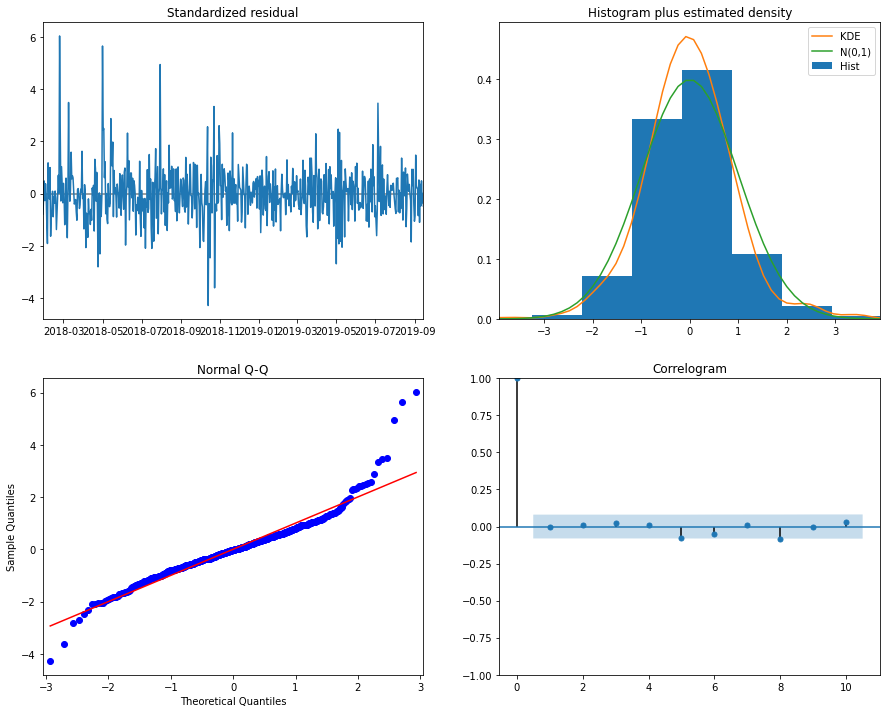

In [144]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [145]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

622 70


In [146]:
test.head()

,GrocerySales
Date,
2019-09-15,8830.99
2019-09-16,8911.24
2019-09-17,9034.61
2019-09-18,8973.45
2019-09-19,9014.11


In [157]:
test.tail()

,GrocerySales
Date,
2019-11-19,8848.98
2019-11-20,8800.45
2019-11-21,9197.99
2019-11-22,9062.44
2019-11-23,8963.12


In [0]:
pred = results.get_prediction(start=pd.to_datetime('2019-09-15'), end =pd.to_datetime('2019-11-23'),dynamic=False)
pred_ci = pred.conf_int()

In [159]:
pred.predicted_mean

2019-09-15    8832.902480
2019-09-16    8809.846513
2019-09-17    8856.628323
2019-09-18    8850.383220
2019-09-19    8840.230498
                 ...     
2019-11-19    8897.083922
2019-11-20    8850.392151
2019-11-21    8878.585413
2019-11-22    8913.700853
2019-11-23    8907.930818
Freq: D, Length: 70, dtype: float64

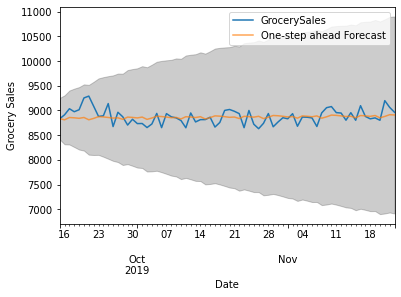

In [160]:
ax = test.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Grocery Sales')
plt.legend()

plt.show()

In [161]:
y_forecasted = pred.predicted_mean
y_truth = test['GrocerySales']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 2))))

The Root Mean Squared Error of our forecasts is 151.39045544551348


## Formulationg Predictions

In [0]:
test = pd.read_csv('/content/Test.csv')
test_date =  pd.date_range(start='2019-11-24',periods=90)
test['Date'] = test_date

In [0]:
test = test.set_index('Date')

In [164]:
test.index

DatetimeIndex(['2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09',
               '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13',
               '2019-12-14', '2019-12-15', '2019-12-16', '2019-12-17',
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-21',
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31', '2020-01-01', '2020-01-02',
               '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18',
      

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2019-11-24'), end =pd.to_datetime('2020-02-21'),dynamic=False)
pred_ci = pred.conf_int()

In [0]:
forecast = pd.DataFrame(pred.predicted_mean,index = test.index,columns=['GrocerySales'])

In [167]:
forecast.shape

(90, 1)

In [168]:
forecast

,GrocerySales
Date,
2019-11-24,8897.253588
2019-11-25,8884.301954
2019-11-26,8890.191642
2019-11-27,8859.456771
2019-11-28,8904.703931
...,...
2020-02-17,8939.942969
2020-02-18,8945.832657
2020-02-19,8915.097786


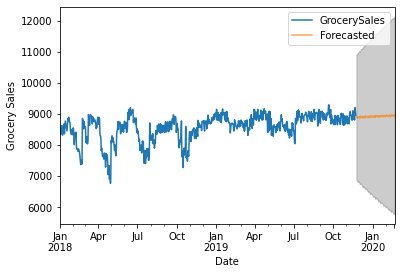

In [170]:
ax = df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Grocery Sales')
plt.legend()

plt.show()

In [0]:
forecast.to_excel('saiarimax.xlsx',index=False)

# Trying LSTM

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error


In [0]:
dftrain = pd.read_csv('/content/Train.csv')
dftest = pd.read_csv('/content/Test.csv')
train_date = pd.date_range(start='2018-01-01',periods=692)
dftrain['Date'] = train_date
test_date =  pd.date_range(start='2019-11-24',periods=90)
dftest['Date'] = test_date

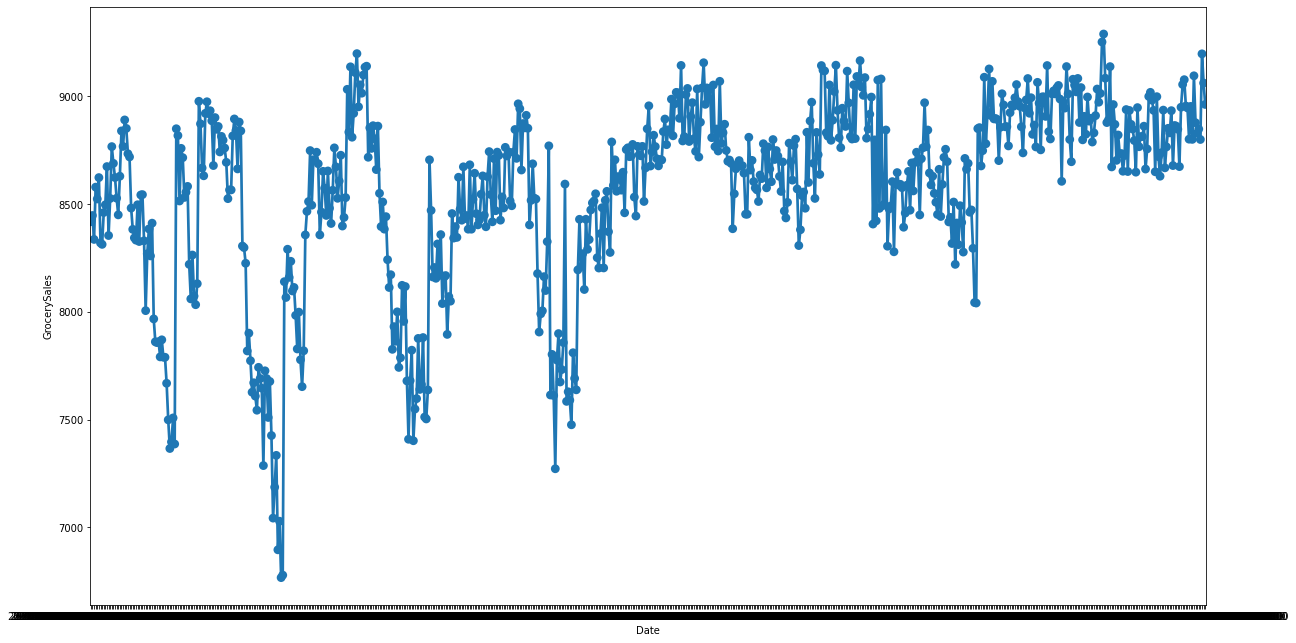

In [175]:
import seaborn as sns
plt.figure(figsize=(20,11))
sns.pointplot(data=dftrain, x='Date', y='GrocerySales')

# Data Preprocessing

In [0]:
from sklearn.preprocessing import MinMaxScaler
#sales_transformer = RobustScaler()
sales_transformer= MinMaxScaler(feature_range=(-1, 1))

sales_transformer = sales_transformer.fit(dftrain[['GrocerySales']])

dftrain['GrocerySales'] = sales_transformer.transform(dftrain[['GrocerySales']])



In [0]:
dftrain = dftrain[['GrocerySales']]

In [0]:
window_size = 50

series_s = dftrain.copy()
for i in range(window_size):
    dftrain = pd.concat([dftrain ,series_s.shift(-(i+1))], axis = 1)
    
dftrain.dropna(axis=0, inplace=True)

In [396]:
dftrain.head()

,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales,GrocerySales
0,0.309389,0.332277,0.244325,0.436649,0.393173,0.471781,0.231343,0.226129,0.343269,0.371720,0.512317,0.258701,0.395043,0.585751,0.524110,0.471876,0.396010,0.334686,0.476805,0.643453,0.586432,0.683894,0.652709,0.559567,0.547806,0.359594,0.281350,0.249983,0.241694,0.371799,0.236598,0.407834,0.409118,0.239181,-0.017716,0.191417,0.282880,0.183611,0.304079,-0.048101,-0.132400,-0.135284,-0.131805,-0.187851,-0.125085,-0.189127,-0.189317,-0.284956,-0.419539,-0.524926,-0.500731
1,0.332277,0.244325,0.436649,0.393173,0.471781,0.231343,0.226129,0.343269,0.371720,0.512317,0.258701,0.395043,0.585751,0.524110,0.471876,0.396010,0.334686,0.476805,0.643453,0.586432,0.683894,0.652709,0.559567,0.547806,0.359594,0.281350,0.249983,0.241694,0.371799,0.236598,0.407834,0.409118,0.239181,-0.017716,0.191417,0.282880,0.183611,0.304079,-0.048101,-0.132400,-0.135284,-0.131805,-0.187851,-0.125085,-0.189127,-0.189317,-0.284956,-0.419539,-0.524926,-0.500731,-0.412454
2,0.244325,0.436649,0.393173,0.471781,0.231343,0.226129,0.343269,0.371720,0.512317,0.258701,0.395043,0.585751,0.524110,0.471876,0.396010,0.334686,0.476805,0.643453,0.586432,0.683894,0.652709,0.559567,0.547806,0.359594,0.281350,0.249983,0.241694,0.371799,0.236598,0.407834,0.409118,0.239181,-0.017716,0.191417,0.282880,0.183611,0.304079,-0.048101,-0.132400,-0.135284,-0.131805,-0.187851,-0.125085,-0.189127,-0.189317,-0.284956,-0.419539,-0.524926,-0.500731,-0.412454,-0.508410
3,0.436649,0.393173,0.471781,0.231343,0.226129,0.343269,0.371720,0.512317,0.258701,0.395043,0.585751,0.524110,0.471876,0.396010,0.334686,0.476805,0.643453,0.586432,0.683894,0.652709,0.559567,0.547806,0.359594,0.281350,0.249983,0.241694,0.371799,0.236598,0.407834,0.409118,0.239181,-0.017716,0.191417,0.282880,0.183611,0.304079,-0.048101,-0.132400,-0.135284,-0.131805,-0.187851,-0.125085,-0.189127,-0.189317,-0.284956,-0.419539,-0.524926,-0.500731,-0.412454,-0.508410,0.651457
4,0.393173,0.471781,0.231343,0.226129,0.343269,0.371720,0.512317,0.258701,0.395043,0.585751,0.524110,0.471876,0.396010,0.334686,0.476805,0.643453,0.586432,0.683894,0.652709,0.559567,0.547806,0.359594,0.281350,0.249983,0.241694,0.371799,0.236598,0.407834,0.409118,0.239181,-0.017716,0.191417,0.282880,0.183611,0.304079,-0.048101,-0.132400,-0.135284,-0.131805,-0.187851,-0.125085,-0.189127,-0.189317,-0.284956,-0.419539,-0.524926,-0.500731,-0.412454,-0.508410,0.651457,0.626557


In [397]:
dftrain.shape

(642, 51)

In [0]:
nrow = round(0.8*dftrain.shape[0])

In [0]:
train = dftrain.iloc[:nrow, :]
test = dftrain.iloc[nrow:,:]

In [0]:
from sklearn.utils import shuffle
train = shuffle(train)

train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [0]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [402]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(514, 50)
(514,)
(128, 50)
(128,)


In [0]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [404]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(514, 50, 1)
(514,)
(128, 50, 1)
(128,)


In [419]:

# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (50,1), output_dim= 50, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 256)               314368    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
________________________________________________

In [420]:
import time

start = time.time()
history = model.fit(train_X,train_y,batch_size=512,nb_epoch=100,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

Train on 462 samples, validate on 52 samples
Epoch 1/100
462/462 [==============================] - 2s 4ms/step - loss: 0.2548 - val_loss: 0.1752
Epoch 2/100
462/462 [==============================] - 1s 3ms/step - loss: 0.1685 - val_loss: 0.0946
Epoch 3/100
462/462 [==============================] - 1s 3ms/step - loss: 0.1062 - val_loss: 0.0481
Epoch 4/100
462/462 [==============================] - 1s 3ms/step - loss: 0.0770 - val_loss: 0.0670
Epoch 5/100
462/462 [==============================] - 1s 3ms/step - loss: 0.1018 - val_loss: 0.0502
Epoch 6/100
462/462 [==============================] - 1s 3ms/step - loss: 0.0779 - val_loss: 0.0446
Epoch 7/100
462/462 [==============================] - 1s 3ms/step - loss: 0.0651 - val_loss: 0.0507
Epoch 8/100
462/462 [==============================] - 1s 3ms/step - loss: 0.0643 - val_loss: 0.0576
Epoch 9/100
462/462 [==============================] - 1s 3ms/step - loss: 0.0680 - val_loss: 0.0602
Epoch 10/100
462/462 [========================

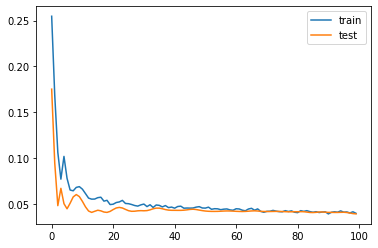

In [421]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [0]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(train_X.shape[1], train_X.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [411]:
history = model.fit(
    train_X, train_y, 
    epochs=50, 
    batch_size=512, 
    validation_split=0.1,
    shuffle=False
)

Train on 462 samples, validate on 52 samples
Epoch 1/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0503 - val_loss: 0.0423
Epoch 2/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0504 - val_loss: 0.0424
Epoch 3/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0512 - val_loss: 0.0424
Epoch 4/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0491 - val_loss: 0.0426
Epoch 5/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0488 - val_loss: 0.0435
Epoch 6/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0471 - val_loss: 0.0443
Epoch 7/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0473 - val_loss: 0.0445
Epoch 8/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0477 - val_loss: 0.0441
Epoch 9/50
462/462 [==============================] - 1s 3ms/step - loss: 0.0482 - val_loss: 0.0434
Epoch 10/50
462/462 [==============================] - 

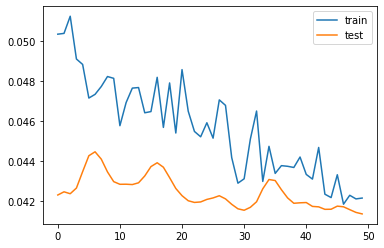

In [412]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [0]:
y_pred = model.predict(test_X)

In [423]:
y_pred.shape

(128, 1)

In [0]:
preds = sales_transformer.inverse_transform(y_pred)
actuals = sales_transformer.inverse_transform(test_y.reshape(-1,1))

In [425]:
np.sqrt(mean_squared_error(actuals,preds))

160.02969933369877

In [0]:
y_train_inv = sales_transformer.inverse_transform(train_y.reshape(1, -1))
y_test_inv = sales_transformer.inverse_transform(test_y.reshape(1, -1))
y_pred_inv = sales_transformer.inverse_transform(y_pred)

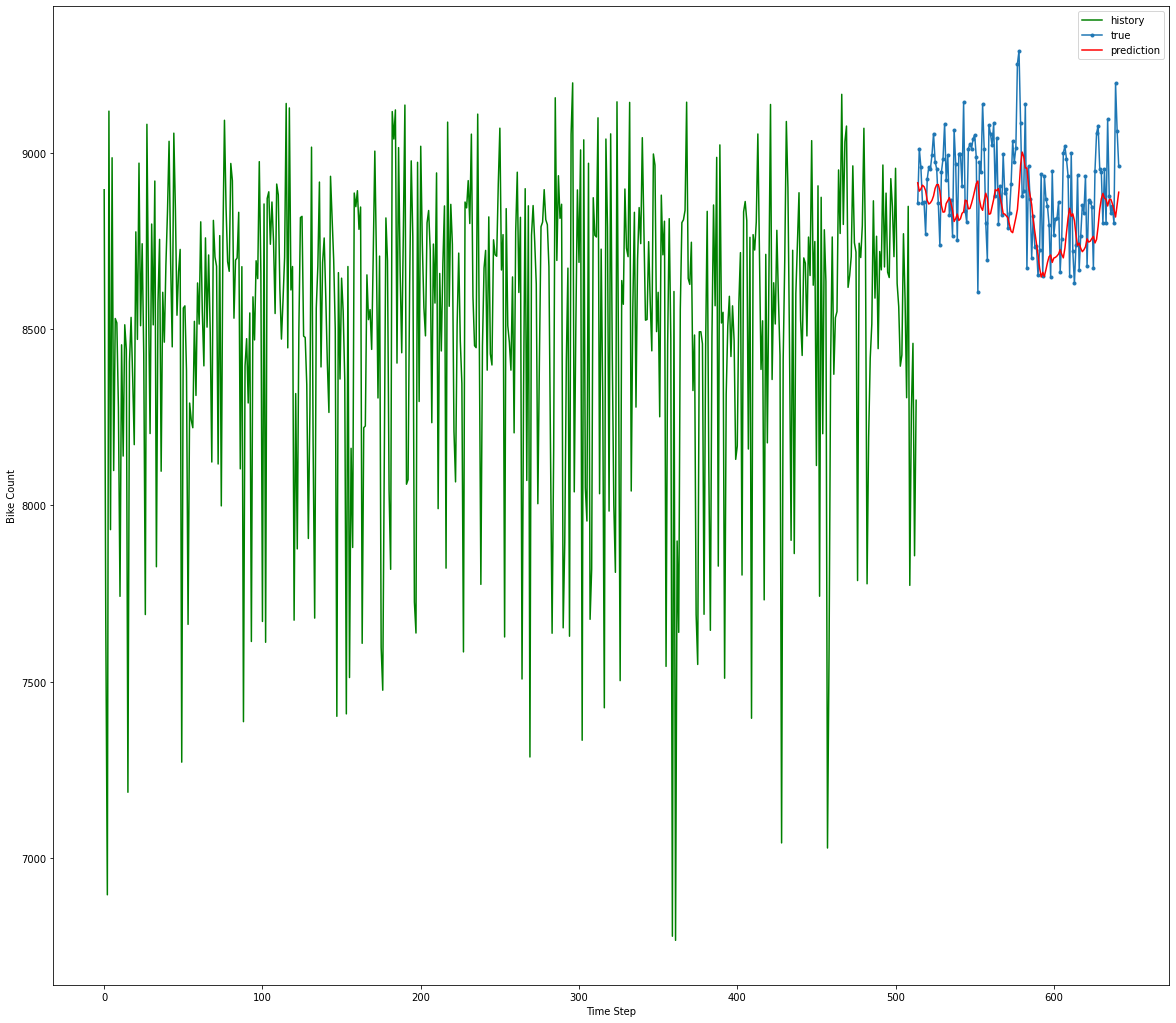

In [435]:
plt.figure(figsize=(20,18))
plt.plot(np.arange(0, len(train_y)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(train_y), len(train_y) + len(test_y)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(train_y), len(train_y) + len(test_y)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

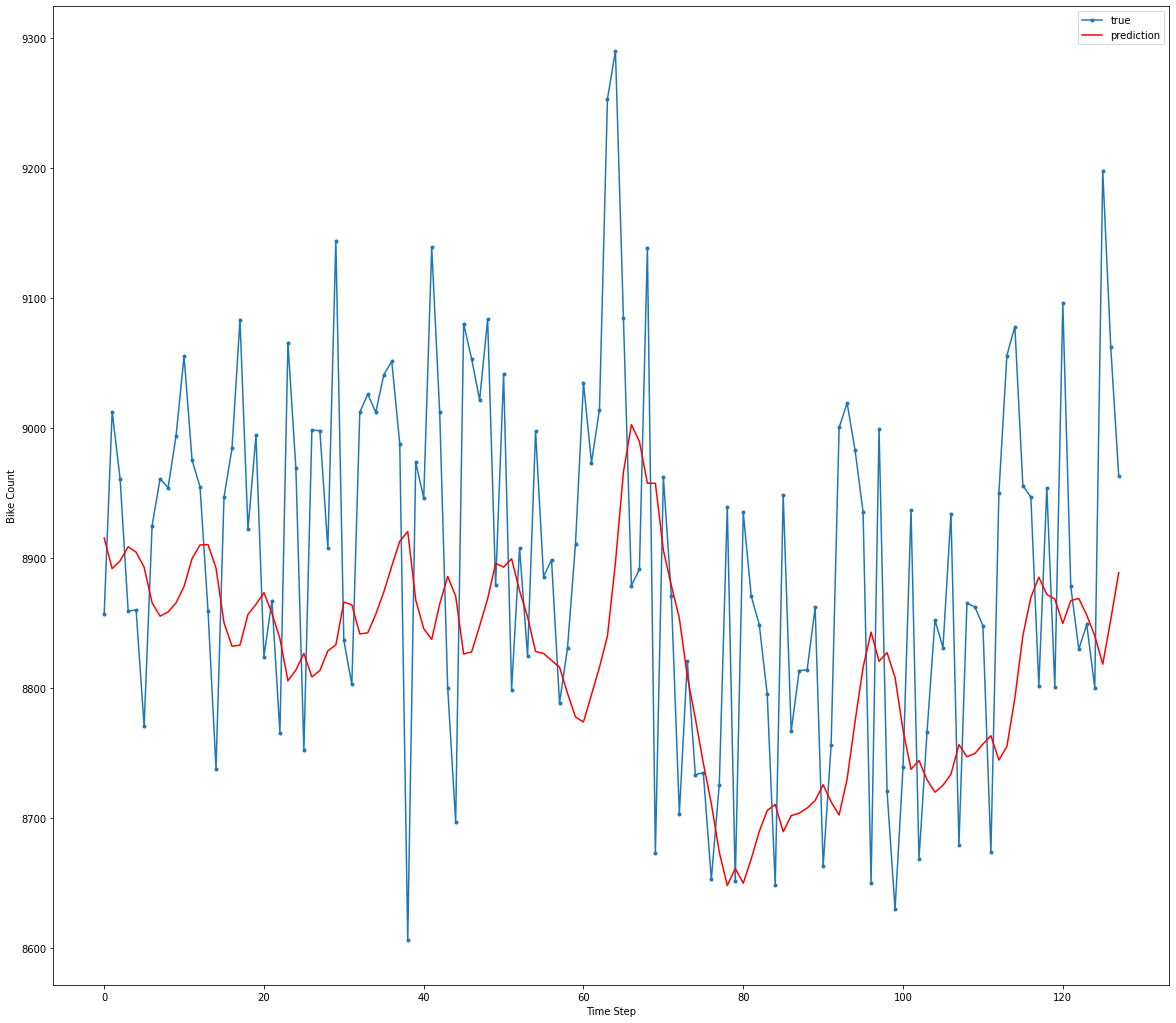

In [436]:
plt.figure(figsize=(20,18))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [371]:
y_pred.shape,test_y.shape

((128, 1), (128,))

In [373]:
from sklearn.metrics import mean_squared_error
predicted = sales_transformer.inverse_transform(y_pred)
actuals = sales_transformer.inverse_transform(test_y.reshape(-1,1))

print(f'RMSE { np.sqrt(mean_squared_error(actuals,predicted))}')

RMSE 167.72532443141478


## Predictions

In [236]:
df_test.head()

,Date
0,2019-11-24
1,2019-11-25
2,2019-11-26
3,2019-11-27
4,2019-11-28


In [0]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    preds_moving = np.array(preds_moving).reshape(1,-1) 
    preds_moving = sales_transformer.inverse_transform(preds_moving)
    return preds_moving

In [0]:
preds_moving = moving_test_window_preds(130)

In [432]:
preds_moving.shape

(1, 130)

In [433]:
preds_moving

array([[8915.505 , 8899.998 , 8892.97  , 8888.878 , 8884.665 , 8879.332 ,
        8871.997 , 8862.735 , 8851.41  , 8838.029 , 8822.854 , 8805.999 ,
        8787.648 , 8767.671 , 8746.719 , 8724.537 , 8701.335 , 8677.395 ,
        8653.005 , 8628.6045, 8604.056 , 8579.732 , 8555.479 , 8532.035 ,
        8509.026 , 8486.969 , 8465.687 , 8445.63  , 8426.996 , 8409.207 ,
        8392.953 , 8378.194 , 8365.311 , 8354.056 , 8344.732 , 8337.492 ,
        8332.009 , 8326.968 , 8323.574 , 8322.006 , 8321.786 , 8322.436 ,
        8324.918 , 8328.409 , 8332.774 , 8338.561 , 8345.094 , 8352.779 ,
        8361.254 , 8370.439 , 8380.5   , 8390.773 , 8401.502 , 8412.569 ,
        8423.88  , 8435.35  , 8446.901 , 8458.463 , 8469.969 , 8481.356 ,
        8492.568 , 8503.552 , 8514.259 , 8524.644 , 8534.665 , 8544.286 ,
        8553.475 , 8562.199 , 8570.436 , 8578.159 , 8585.35  , 8591.992 ,
        8598.072 , 8603.579 , 8608.505 , 8612.847 , 8616.6   , 8619.767 ,
        8622.351 , 8624.356 , 8625.794

In [440]:
preds_moving.shape

(1, 130)

In [0]:
forecast = [ p[0] for p in preds_moving.T[-90:]]

In [0]:
df_test = df_test.set_index('Date')

In [450]:
df_test.head()

,GrocerySales
Date,
2019-11-24,0
2019-11-25,0
2019-11-26,0
2019-11-27,0
2019-11-28,0


In [0]:
forecast_df = pd.DataFrame(forecast,index=df_test.index,columns=['GrocerySales'])

In [452]:
forecast_df

,GrocerySales
Date,
2019-11-24,8321.786133
2019-11-25,8322.435547
2019-11-26,8324.917969
2019-11-27,8328.409180
2019-11-28,8332.774414
...,...
2020-02-17,8497.197266
2020-02-18,8497.881836
2020-02-19,8498.793945


In [453]:
df_train.head()

,Date,GrocerySales
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


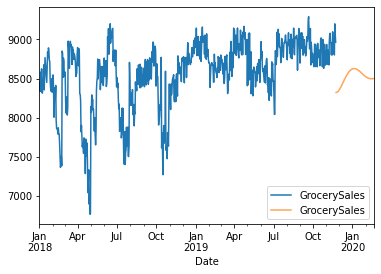

In [460]:
#df_train = df_train.set_index('Date')
ax = df_train.plot(label='observed')
forecast_df.plot(ax=ax, label='Forecasted', alpha=.7)
plt.legend()